In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc

# First Look at the Data

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no null values in the data. There is no need to perform null value handling techniques to clean the data.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Number of Total Transactions against Time')

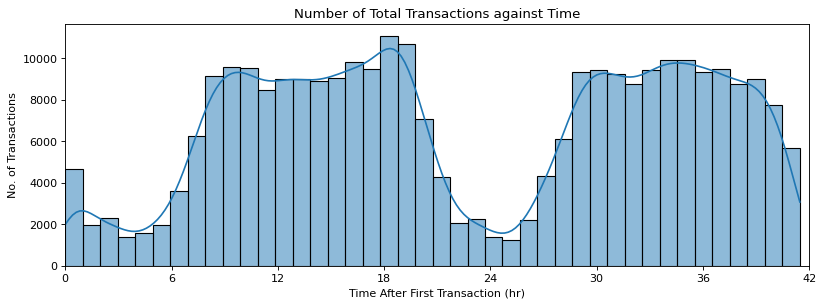

In [8]:
plt.figure(figsize=(12,4), dpi=80)
t = sns.histplot(df['Time'], bins=42, kde=True)
plt.xlim([0,48])
plt.xticks(np.arange(0,200000,25000), np.arange(0,48,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('No. of Transactions')
plt.title('Number of Total Transactions against Time')


Text(0.5, 1.0, 'Number of Non-Fraud Transactions against Time')

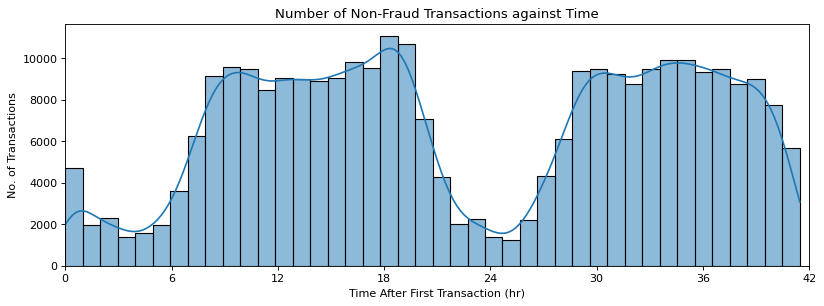

In [9]:
df_nofraud = df[df['Class'] == 0]
plt.figure(figsize=(12,4), dpi=80)
t = sns.histplot(df_nofraud['Time'], bins=42, kde=True)
plt.xlim([0,48])
plt.xticks(np.arange(0,200000,25000), np.arange(0,48,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('No. of Transactions')
plt.title('Number of Non-Fraud Transactions against Time')

Text(0.5, 1.0, 'Number of Fraud Transactions against Time')

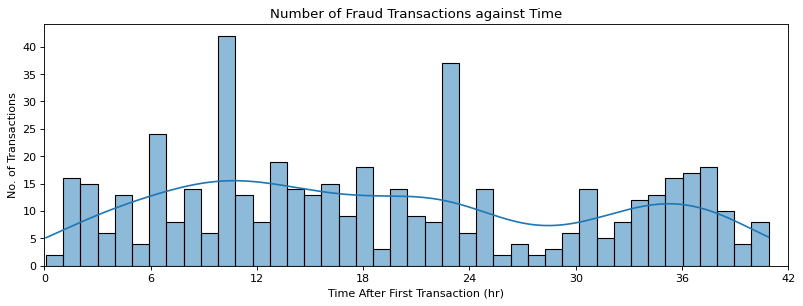

In [10]:
df_nofraud = df[df['Class'] == 1]
plt.figure(figsize=(12,4), dpi=80)
t = sns.histplot(df_nofraud['Time'], bins=42, kde=True)
plt.xlim([0,48])
plt.xticks(np.arange(0,200000,25000), np.arange(0,48,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('No. of Transactions')
plt.title('Number of Fraud Transactions against Time')

The number of non-fraud transactions dives during the late nights since most people are sleeping during that time. On the other hand, the fradulent transactions is relatively constant throughout.

C:\Users\Jeffrey\anaconda3\envs\cc_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

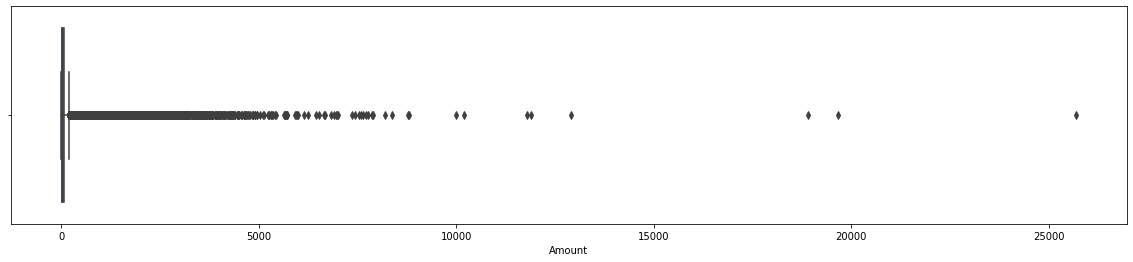

In [11]:
plt.figure(figsize=(20,4))
sns.boxplot(df.Amount)

There are some outliers that are far off from the bulk of the sample. We should remove as many of these outliers without removing any fraudulent transactions since there is already not many of such data points in the sample.

In [12]:
from scipy.stats import iqr
upper_limit = df.Amount.quantile(0.75) + (1.5*iqr(df.Amount))
print(upper_limit)
print(df[df.Amount>upper_limit]['Class'].value_counts())

184.5125
0    31813
1       91
Name: Class, dtype: int64


There are 91 fraudulent transaction and 31813 non-fraud transactions above the upper limit. Therefore, we cannot remove all the data points above the upper limit.

In [13]:
manual_upper_limit = 6000
df[df.Amount>manual_upper_limit]['Class'].value_counts()

0    32
Name: Class, dtype: int64

If we manually set the upper limit to 6000. We will just be removing 19 data points that are non-fraud transactions. This is a good value for the upper limit and we will proceed to remove the data points above the upper limit from the dataset.

In [14]:
df = df[df.Amount <= manual_upper_limit]
df.Class.value_counts()

0    284283
1       492
Name: Class, dtype: int64

# Correlation Analysis

<AxesSubplot:>

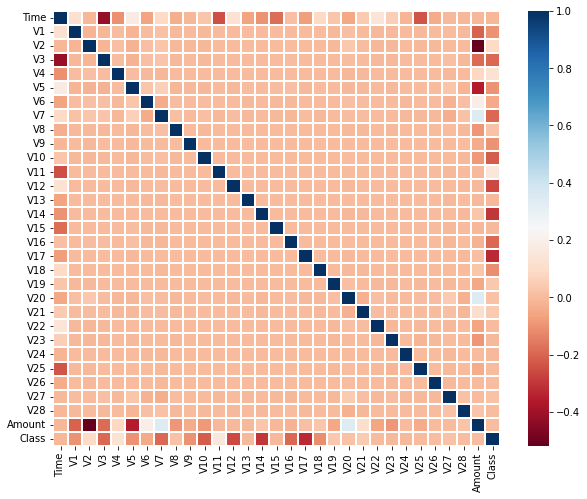

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='RdBu', linewidth=0.1, annot=False)

We can see that the features do not exhibit strong correlation between each other. Therefore, there is no need to perform feature extraction to remove any feature. A rule of thumb is to remove any features that have correlation > 0.8.

# Dealing with Imbalanced Dataset

In [16]:
non_fraud = df[df['Class'] == 0].sample(2000)
fraud = df[df['Class'] == 1]
print(len(non_fraud), len(fraud))

2000 492


In [17]:
df_new = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)

We perform the undersampling technique whereby we sample just 2000 non-fraud data points from the 200k+ in the original dataset. This is to reduce the imbalance class issue since 2000 non-fraud data points will not dominate the 492 fraudulent data points as much.

# Training the Machine Learning Classifiers
We will train and compare the following machine learning models:
1. Logistic Regression
2. Decision Tree
3. Gradient Boosted Decision Tree

## Logistic Regression

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       403
           1       0.98      0.89      0.93        96

    accuracy                           0.97       499
   macro avg       0.98      0.94      0.96       499
weighted avg       0.97      0.97      0.97       499



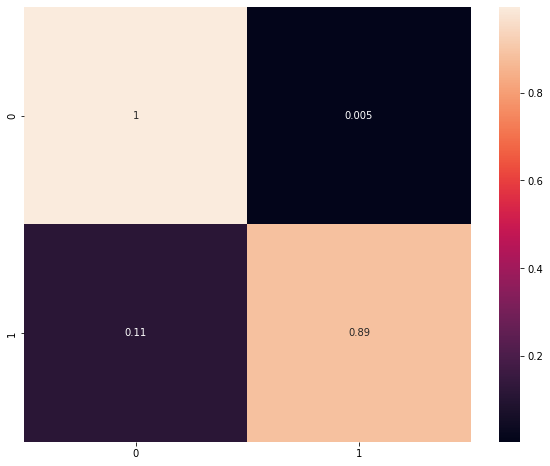

In [18]:
train_x, test_x, train_y, test_y = train_test_split(df_new.loc[:, df_new.columns!='Class'], df_new.Class, test_size=0.2, random_state = 5)
clf = LogisticRegression(max_iter=300).fit(train_x, train_y)
pred_y_lr = clf.predict(test_x)
print(classification_report(test_y, pred_y_lr))
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(test_y, pred_y_lr, normalize='true'), annot=True)
plt.show()

However, it is known that confusion matrix accuracies are not efficient for imbalanced datasets. Instead, we can use the area under the precision-recall curve (AUPRC).

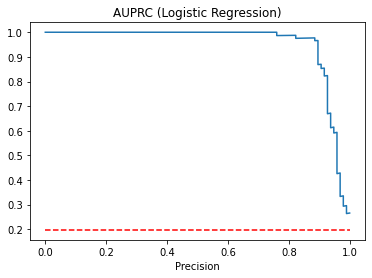

In [19]:
pred_probs_lr = clf.predict_proba(test_x)
pred_probs_lr = pred_probs_lr[:, 1]
precision_lr, recall_lr, _ = precision_recall_curve(test_y, pred_probs_lr)
plt.plot(recall_lr, precision_lr, label='Logistic')
baseline = 492 / 2492
plt.hlines(xmin=0, xmax=1, y=baseline, linestyle='--', color='r', label='Baseline')
plt.xlabel('Recall')
plt.xlabel('Precision')
plt.title('AUPRC (Logistic Regression)')
plt.show()

## Decision Tree

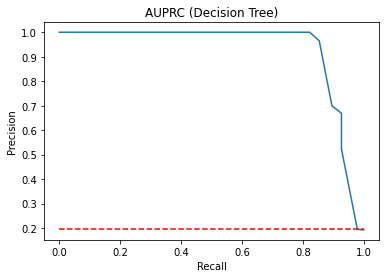

In [20]:
tree_model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
tree_model.fit(train_x, train_y)
pred_probs_tree = tree_model.predict_proba(test_x)
pred_probs_tree = pred_probs_tree[:, 1]
precision_tree, recall_tree, _ = precision_recall_curve(test_y, pred_probs_tree)
plt.plot(recall_tree, precision_tree, label='Decision Tree')
baseline = 492 / 2492
plt.hlines(xmin=0, xmax=1, y=baseline, linestyle='--', color='r', label='Baseline')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUPRC (Decision Tree)')
plt.show()

## Gradient Boosting Decision Tree

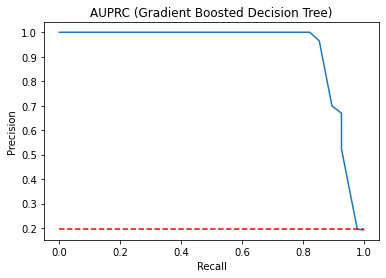

In [21]:
gbc_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=4)
gbc_model.fit(train_x, train_y)
pred_probs_gbc = gbc_model.predict_proba(test_x)
pred_probs_gbc = pred_probs_gbc[:, 1]
precision_gbc, recall_gbc, _ = precision_recall_curve(test_y, pred_probs_gbc)
plt.plot(recall_tree, precision_tree, label='Gradient Boosting')
baseline = 492 / 2492
plt.hlines(xmin=0, xmax=1, y=baseline, linestyle='--', color='r', label='Baseline')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUPRC (Gradient Boosted Decision Tree)')
plt.show()

Comparing all three models, we have:

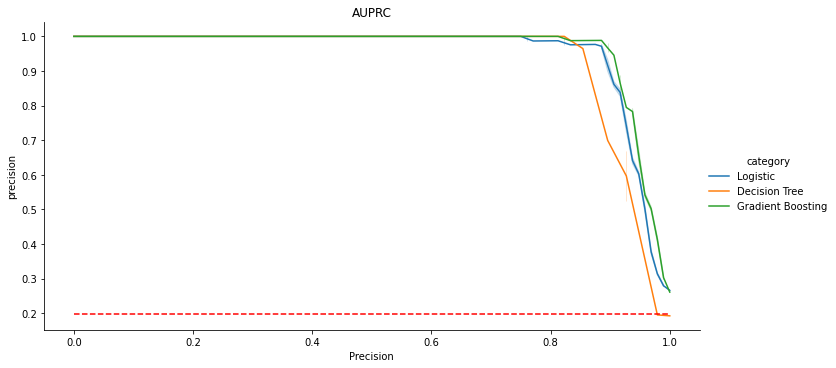

AUC (Logistic Regression): 0.9530123752349651
AUC (Decision Tree):       0.9324024878515186
AUC (GB Decision Tree):    0.9619800135796247


In [22]:
data_rp = pd.DataFrame(np.concatenate((recall_lr, recall_tree, recall_gbc)), columns=['recall'])
data_rp['precision'] = np.concatenate((precision_lr, precision_tree, precision_gbc))
data_rp['category'] = ['Logistic' for _ in range(recall_lr.shape[0])] + ['Decision Tree' for _ in range(recall_tree.shape[0])] + ['Gradient Boosting' for _ in range(recall_gbc.shape[0])]
sns.relplot(data=data_rp, x='recall', y='precision', hue='category', kind='line', aspect=2.0)
baseline = 492 / 2492
plt.hlines(xmin=0, xmax=1, y=baseline, linestyle='--', color='r', label='Baseline')
plt.xlabel('Recall')
plt.xlabel('Precision')
plt.title('AUPRC')
plt.show()
print("AUC (Logistic Regression):", auc(recall_lr, precision_lr))
print("AUC (Decision Tree):      ", auc(recall_tree, precision_tree))
print("AUC (GB Decision Tree):   ", auc(recall_gbc, precision_gbc))

We can see that all the models performed well, with all the AUC values above 0.9. Gradient Boosted Tree performed the best, and has a relatively great improvement over the Decision Tree model.